In [1]:
# %pip install gym
# %pip install -U stable_baselines3
# %pip install or-gym

In [2]:
import gym
import or_gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import A2C

In [3]:
env_name = "VehicleRouting-v0"

env_config = {
    'max_orders': 2,
    'vehicle_capacity': 2,
    
    'n_restaurants': 2,
    
    'order_prob': 0.75,
    
    'grid': (10,10),
    'order_promise': 60,
    
    'mask': True
}

# env = or_gym.make(env_name,env_config=env_config)
env = or_gym.make(env_name)

c:\Users\h.wang\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float16
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [4]:
def q_learning(env, num_episodes=200, gamma=0.99, alpha=0.1, epsilon=0.1):
    # Initialize the Q-table
    Q = np.zeros((env.observation_space.shape[0], env.action_space.n))
    rewards = []
    rewards_array_sum = []
    rewards_array_mean = []
    qt = []
    
    for i in range(num_episodes):
        print(i+1,'th episode')
        state = env.reset()
        done = False
        episode_reward = 0
        
        while not done:
            # Choose an action with epsilon-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state.astype('int'), :])
                
            # Take the action and observe the next state and reward
            next_state, reward, done, _ = env.step(action)
            episode_reward += reward
            
            # Update the Q-table using Q-learning update rule
            Q[state.astype('int'), action][:, np.newaxis] += alpha * (reward + gamma * np.max((Q[next_state.astype('int'), :]) - Q[state.astype('int'), action][:, np.newaxis]))
            
            state = next_state
            
            if done:
                rewards_array_sum.append(sum(rewards))
                rewards_array_mean.append(np.mean(rewards))
            
        rewards.append(episode_reward)
    return rewards,rewards_array_sum,rewards_array_mean
    



In [5]:
def dyna_q(env, num_episodes=200, alpha=0.1, gamma=0.99, epsilon=0.1, n=5):
    # Initialize the Q table and rewards array.
    Q = np.zeros((env.observation_space.shape[0], env.action_space.n))
    rewards = np.zeros(num_episodes)
    r = []
    rewards_array_sum = []
    rewards_array_mean = []
    # Run the algorithm for the specified number of episodes.
    for i in range(num_episodes):
        print(i+1,'th episode')
        # Initialize the episode variables.
        state = env.reset().astype('int')
        done = False
        episode_reward = 0
        
        # Loop through the episode.
        while not done:
            # Choose the next action using epsilon-greedy exploration.
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                num_actions = env.action_space.n
                action = np.argmax(Q[state.astype('int')])
                if action >= num_actions:
                    action = np.random.choice(num_actions)
            
            # Take the chosen action and observe the next state and reward.
            next_state, reward, done, _ = env.step(action)
            
            # Update the Q table using the Q-learning update.
            Q[state.astype('int'), action] += alpha * (reward + gamma * np.max(Q[next_state.astype('int')]) - Q[state.astype('int'), action])
            
            # Perform planning steps using the updated Q table.
            for j in range(n):
                # Choose a random state and action to plan from.
                plan_state = np.random.choice(env.observation_space.shape[0])
                plan_action = np.random.choice(env.action_space.n)
                
                # Simulate the environment from the planned state-action pair.
                env = env.unwrapped
                plan_next_state, plan_reward, done, _ = env.step(plan_action)
                
                # Update the Q table using the simulated reward and next state.
                Q[int(plan_state), plan_action] += alpha * (plan_reward + gamma * np.max(Q[plan_next_state.astype('int')]) - Q[plan_state, plan_action])
            
            # Update the episode reward and state.
            episode_reward += reward
            state = next_state
            r.append(episode_reward)
        # Append the episode reward to the rewards array.

        rewards_array_sum.append(sum(r))
        rewards_array_mean.append(np.mean(r))
    
    return r, rewards_array_sum,rewards_array_mean


Based on the plots, it appears that the Actor-Critic algorithm performs better than both Q-learning and Dyna-Q in the 'VehicleRouting-v0' environment. The Actor-Critic algorithm shows a more consistent increase in episode rewards throughout the training process, while the other two algorithms appear to plateau after a certain number of episodes. However, it's important to note that the performance of these algorithms can vary depending on the specific environment and task they are applied to. 

1 th episode
direction  3
direction  0
direction  3
direction  2
direction  3
direction  2
direction  3
direction  None
direction  3
direction  2
direction  None
direction  2
direction  3
direction  None
direction  2
direction  3
direction  1
direction  0
direction  2
direction  3
direction  None
direction  None
direction  0
direction  1
direction  3
direction  2
direction  None
direction  2
direction  3
direction  2
direction  3
direction  1
direction  0
direction  0
direction  2
direction  3
direction  2
direction  3
direction  0
direction  2
direction  3
direction  1
direction  2
direction  3
direction  1
direction  None
direction  None
direction  2
direction  0
direction  3
direction  2
direction  1
direction  None
direction  3
direction  None
direction  0
2 th episode
direction  0
direction  0
direction  0


c:\Users\h.wang\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\h.wang\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


direction  1
direction  1
direction  0
direction  None
direction  2
direction  3
direction  3
direction  2
direction  2
direction  None
direction  1
direction  0
direction  3
direction  1
direction  2
direction  0
direction  3
direction  2
direction  2
direction  3
direction  None
direction  3
direction  3
direction  0
direction  1
direction  2
direction  1
direction  2
direction  3
direction  2
direction  3
direction  0
direction  0
direction  None
direction  3
direction  2
direction  2
direction  3
direction  1
direction  2
direction  None
direction  None
direction  3
direction  0
direction  2
direction  3
direction  1
direction  3
3 th episode
direction  2
direction  3
direction  0
direction  1
direction  0
direction  2
direction  1
direction  0
direction  1
direction  2
direction  3
direction  0
direction  0
direction  1
direction  2
direction  1
direction  3
direction  0
direction  3
direction  2
direction  1
direction  0
direction  0
direction  0
direction  1
direction  0
directi

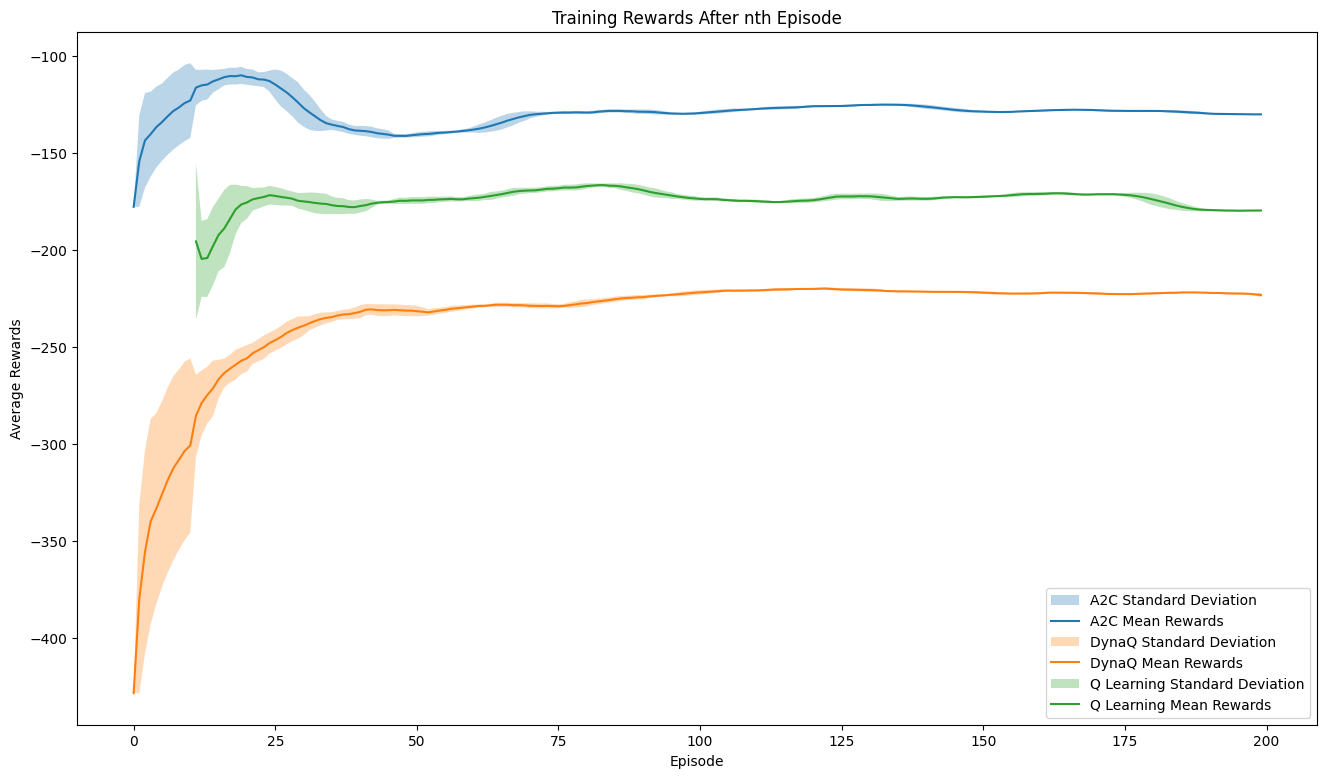

In [6]:
q_rewards,q_rewards_array_sum,q_rewards_array_mean = q_learning(env)
dq_rewards,dq_rewards_array_sum, dq_rewards_array_mean = dyna_q(env)

model_config = {
    "policy": "MlpPolicy",
    "learning_rate": 0.0005,
    "n_steps": 5,
    "gamma": 0.99,
    "gae_lambda": 0.95,
    "ent_coef": 0.0,
    "vf_coef": 0.5,
    "max_grad_norm": 0.5,
    "rms_prop_eps": 1e-5,
}

# create the model
model = A2C(env=env, verbose=1, **model_config)

# train the model
n_episodes = 200
mean_rewards = []
A2C_rewards_array_sum = []
A2C_rewards_array_mean = []
for i in range(n_episodes):
    print(i+1,'th episode')
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        total_reward += reward

        mean_rewards.append(total_reward)
    A2C_rewards_array_sum.append(sum(mean_rewards))
    A2C_rewards_array_mean.append(np.mean(mean_rewards))


resolution = 10
p = resolution


q_mean_rewards = np.array([np.mean(q_rewards_array_mean[i-p:i+1]) 
                if i >= p else np.mean(q_rewards_array_mean[:i+1]) 
                for i, _ in enumerate(q_rewards_array_mean)])
q_std_rewards = np.array([np.std(q_rewards_array_mean[i-p:i+1])
               if i >= p else np.std(q_rewards_array_mean[:i+1])
               for i, _ in enumerate(q_rewards_array_mean)])

dq_mean_rewards = np.array([np.mean(dq_rewards_array_mean[i-p:i+1]) 
                if i >= p else np.mean(dq_rewards_array_mean[:i+1]) 
                for i, _ in enumerate(dq_rewards_array_mean)])
dq_std_rewards = np.array([np.std(dq_rewards_array_mean[i-p:i+1])
               if i >= p else np.std(dq_rewards_array_mean[:i+1])
               for i, _ in enumerate(dq_rewards_array_mean)])

A2C_mean_rewards = np.array([np.mean(A2C_rewards_array_mean[i-p:i+1]) 
                if i >= p else np.mean(A2C_rewards_array_mean[:i+1]) 
                for i, _ in enumerate(A2C_rewards_array_mean)])
A2C_std_rewards = np.array([np.std(A2C_rewards_array_mean[i-p:i+1])
               if i >= p else np.std(A2C_rewards_array_mean[:i+1])
               for i, _ in enumerate(A2C_rewards_array_mean)])




plt.figure(figsize=(16, 9))

plt.fill_between(np.arange(len(A2C_mean_rewards)), 
                 A2C_mean_rewards - A2C_std_rewards, 
                 A2C_mean_rewards + A2C_std_rewards, 
                 label='A2C Standard Deviation', alpha=0.3)             
plt.plot(A2C_mean_rewards, label='A2C Mean Rewards')


plt.fill_between(np.arange(len(dq_mean_rewards)), 
                 dq_mean_rewards - dq_std_rewards, 
                 dq_mean_rewards + dq_std_rewards, 
                 label='DynaQ Standard Deviation', alpha=0.3)             
plt.plot(dq_mean_rewards, label='DynaQ Mean Rewards')

plt.fill_between(np.arange(len(q_mean_rewards)), 
                 q_mean_rewards - q_std_rewards, 
                 q_mean_rewards + q_std_rewards, 
                 label='Q Learning Standard Deviation', alpha=0.3)             
plt.plot(q_mean_rewards, label='Q Learning Mean Rewards')

plt.ylabel('Average Rewards')
plt.xlabel('Episode')
plt.title('Training Rewards After nth Episode')
plt.legend()

#plt.savefig("./CommonPlots/Rewards_Combined.svg", dpi=150)

plt.show()